# Laboratório de Simulações Numéricas (PME3201)

Resolução da quinta lista de exercícios com os códigos das simulações feitas a partir das equações obtidas, referentes à Dinâmica de um Sistema de Partículas

##### Lucas Carvalho
##### Gustavo Bomer
##### Enzo Patrus

Engenharia Mecânica (2023)

### Configuração do Ambiente e Bibliotecas

Importação das principais biblitoecas que vão ser utilizadas no desenvolvimento da tarefa.

- Numpy para os cálculso de álgebra linear
- Matplotlib para a criação de gráficos
- Scipy para utilizar os métodos de integração numérica



In [1]:
!pip install plotly --quiet

In [2]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import eigh
import plotly.graph_objects as go

## Descrição do Problema

Nesta aula examinaremos um problema clássico da Mecânica: a transferência de oscilações entre dois pêndulos apoiados sobre uma base flexível. Para torná-lo apropriado à análise, consideraremos um modelo físico simplificado.



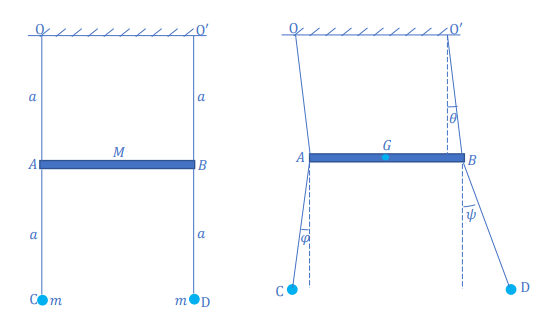

Primeiramente, algumas definições.

In [3]:
M = 10
m = 1
a = 1
g = 9.8

## 2) Questão 2

In [4]:
def non_linear_model(t, z):
  theta, phi, psi, omega_theta, omega_phi, omega_psi = z

  domega_theta = (-(np.cos(theta - psi))*(-np.sin(theta - psi)*(omega_theta**2) + (g/a)*np.sin(psi)) - (np.cos(theta - phi))*(-np.sin(theta - phi)*(omega_theta**2) + (g/a)*np.sin(phi)) + (np.sin(theta - phi)*(omega_phi**2) + np.sin(theta - psi)*(omega_psi**2) + 2*((M/2*m) + 1)*(g/a)*np.sin(theta)))/(-(2*(M/(2*m) + 1)) + (np.cos(theta - phi))*(np.cos(theta - phi)) + (np.cos(theta - psi))*(np.cos(theta - psi)))
  domega_phi = ((np.cos(theta - phi))*(np.cos(theta - psi))*(-np.sin(theta - psi)*(omega_theta**2) + (g/a)*np.sin(psi)) + (2*(M/(2*m) + 1))*(-np.sin(theta - phi)*(omega_theta**2) + (g/a)*np.sin(phi)) - (np.cos(theta - psi))*(np.cos(theta - psi))*(-np.sin(theta - phi)*(omega_theta**2) + (g/a)*np.sin(phi)) - (np.cos(theta - phi))*(np.sin(theta - phi)*(omega_phi**2) + np.sin(theta - psi)*(omega_psi**2) + 2*((M/2*m) + 1)*(g/a)*np.sin(theta)))/(-(2*(M/(2*m) + 1)) + (np.cos(theta - phi))*(np.cos(theta - phi)) + (np.cos(theta - psi))*(np.cos(theta - psi)))
  domega_psi = ((2*(M/(2*m) + 1))*(-np.sin(theta - psi)*(omega_theta**2) + (g/a)*np.sin(psi)) - (np.cos(theta - phi))*(np.cos(theta - phi))*(-np.sin(theta - psi)*(omega_theta**2) + (g/a)*np.sin(psi)) + (np.cos(theta - phi))*(np.cos(theta - psi))*(-np.sin(theta - phi)*(omega_theta**2) + (g/a)*np.sin(phi)) - (np.cos(theta - psi))*(np.sin(theta - phi)*(omega_phi**2) + np.sin(theta - psi)*(omega_psi**2) + 2*((M/2*m) + 1)*(g/a)*np.sin(theta)))/(-(2*(M/(2*m) + 1)) + (np.cos(theta - phi))*(np.cos(theta - phi)) + (np.cos(theta - psi))*(np.cos(theta - psi)))

  return [omega_theta, omega_phi, omega_psi, domega_theta, domega_phi, domega_psi]

#### Simulações

In [5]:
theta_0 = [np.radians(20), np.radians(20), np.radians(30), np.radians(30)]
omega_theta_0 = [0, 0, 0, 0]

phi_0 = [np.radians(30), np.radians(30.1), np.radians(30), np.radians(30.1)]
omega_phi_0 = [0, 0, 0, 0]

psi_0 = [np.radians(60), np.radians(60.1), np.radians(60), np.radians(60.1)]
omega_psi_0 = [0, 0, 0, 0]

z0 = list(zip(theta_0, phi_0, psi_0, omega_theta_0, omega_phi_0, omega_psi_0)) # zip de vetores para condições iniciais

In [6]:
# Tempo de simulação
t_span = [0, 10]  # de 0 a 10 segundos
sol = []

for n in range(4):
    if n >= 2:
      M = 1
    solution = solve_ivp(non_linear_model, t_span, z0[n], method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    sol.append(solution)  # Adicione o resultado ao final da lista sol

Plotando os resultados

In [7]:
# Extract the results
for n in range(4):
    theta, phi, psi, omega_theta, omega_phi, omega_psi = sol[n].y

    # Create a 3D plot for each trial
    fig = go.Figure(data=[go.Scatter3d(x=theta, y=phi, z=psi, mode='lines', name=f'Trial {n+1}')])

    fig.update_layout(scene=dict(aspectratio=dict(x=1.5, y=1.5, z=0.5)))
    fig.update_layout(scene=dict(xaxis=dict(title='Theta (rad)'),
                                 yaxis=dict(title='Phi (rad)'),
                                 zaxis=dict(title='Psi (rad)')))
    fig.update_layout(title=f'3D Trajectory in Phase Space - Trial {n+1}')

    # Save the figure with index
    # Display the figure
    fig.show()

#### Observação de Erro Relativo

Vamos refazer a integração em um tempo muito maior, permitindo visualizar essa diferença entre os dois casos.

In [8]:
# Tempo de simulação
t_span = [0, 120]  # de 0 a 3 minutos
sol = []

for n in range(4):
    if n >= 2:
      M = 1
    solution = solve_ivp(non_linear_model, t_span, z0[n], method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    sol.append(solution)  # Adicione o resultado ao final da lista sol

In [9]:
# Plot both trials on the same figure
for n in range(2):
    # Extract relevant data within the specified time range
    t = sol[n].t
    indices = np.where((t >= time_start) & (t <= time_end))[0]

    # Extract relevant data within the specified time range
    theta, phi, psi, omega_theta, omega_phi, omega_psi = sol[n].y[:, indices]

    # Plot the trajectory in 3D space for the specified time range with different colors
    fig.add_trace(go.Scatter3d(x=np.degrees(theta), y=np.degrees(phi), z=np.degrees(psi),
                               mode='lines', name=f'Trial {n+1}'))

fig.update_layout(scene=dict(aspectratio=dict(x=1.5, y=1.5, z=0.5)))
fig.update_layout(scene=dict(xaxis=dict(title='Theta (degrees)'),
                             yaxis=dict(title='Phi (degrees)'),
                             zaxis=dict(title='Psi (degrees)')))
fig.update_layout(title='Combined 3D Trajectory in Phase Space (Time: {} to {} seconds)'.format(time_start, time_end))

fig.show()


NameError: name 'time_start' is not defined

## Questão 04

#### Forma de Espaço de Estados

\begin{equation}
    \begin{aligned}
        \begin{bmatrix}
            x_1 \\
            x_2 \\
            x_3 \\
            x_4 \\
            x_5 \\
            x_6
        \end{bmatrix} = \begin{bmatrix}
            \theta \\
            \dot{\theta} \\
            \varphi \\
            \dot{\varphi} \\
            \psi \\
            \dot{\psi}  
        \end{bmatrix} \implies
        \begin{bmatrix}
            \dot{x_1} \\
            \dot{x_2} \\
            \dot{x_3} \\
            \dot{x_4} \\
            \dot{x_5} \\
            \dot{x_6}
        \end{bmatrix} =
        \begin{bmatrix}
            x_2 \\
            \frac{\omega^2}{2(k^2-1)}(x_3 + x_5) - \frac{k^2\omega^2}{k^2-1}x_1 \\
            x_4 \\
             -\frac{\omega^2}{2(k^2-1)}(x_3 + x_5) + \frac{k^2\omega^2}{k^2-1}x_1 - \omega^2x_3\\
            x_6 \\
             -\frac{\omega^2}{2(k^2-1)}(x_3 + x_5) + \frac{k^2\omega^2}{k^2-1}x_1 - \omega^2x_5
        \end{bmatrix}
    \end{aligned}
\end{equation}

In [ ]:
def linear_model(t, z):
    theta, phi, psi, omega_theta, omega_phi, omega_psi = z

    domega_theta = ((omega**2)/(2*(k**2 + 1)))*(phi + psi) - (((k**2)*(omega**2))/(k**2 - 1))*theta
    domega_phi = -((omega**2)/(2*(k**2 + 1)))*(theta + psi) + (((k**2)*(omega**2))/(k**2 - 1))*theta - (omega**2)*(phi)
    domega_psi = -((omega**2)/(2*(k**2 + 1)))*(theta + phi) + (((k**2)*(omega**2))/(k**2 - 1))*theta - (omega**2)*(psi)

    return [omega_theta, omega_phi, omega_psi, domega_theta, domega_phi, domega_psi]

#### Simulações

Para as simulações, as condições iniciais são fixas, variando apenas os parâmetros.

In [ ]:
z0 = [np.radians(2), np.radians(-1), 0, 0, 0, 0]

M = [100, 10, 10]
m = [1, 1, 1]
a = [1, 1, 2]
g = [10, 10, 10]

params = list(zip(M, m, a, g))

Agora, hora de simular

In [ ]:
# Tempo de simulação
t_span = [0, 120]  # de 0 a 2 minutos
sol = []

for n in range(3):
    omega = np.sqrt(params[n][3]/params[n][2])
    k = np.sqrt(params[n][0]/(2*params[n][1]) + 1)
    solution = solve_ivp(linear_model, t_span, z0, method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    sol.append(solution)  # Adicione o resultado ao final da lista sol

Visualizando

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Loop sobre as soluções
for n in range(3):
    solution = sol[n]

    # Extraia os resultados
    t = solution.t
    theta, phi, psi, omega_theta, omega_phi, omega_psi = solution.y

    # Plotagem dos gráficos
    plt.figure(figsize=(12, 8))

    # Gráfico para theta
    plt.subplot(2, 3, 1)
    plt.plot(t, np.degrees(theta), label='Theta')
    plt.title(f'Cenário {n+1}: Theta vs Tempo')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Theta (graus)')
    plt.tight_layout()
    plt.show()

    # Gráfico para phi
    plt.figure(figsize=(12, 8))
    plt.plot(t, np.degrees(phi), label='Phi')
    plt.title(f'Cenário {n+1}: Phi vs Tempo')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Phi (graus)')
    plt.tight_layout()
    plt.show()

    # Gráfico para psi
    plt.figure(figsize=(12, 8))
    plt.plot(t, np.degrees(psi), label='Psi')
    plt.title(f'Cenário {n+1}: Psi vs Tempo')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Psi (graus)')
    plt.tight_layout()
    plt.show()

    # Gráfico para theta_ponto
    plt.figure(figsize=(12, 8))
    plt.plot(t, np.degrees(omega_theta), label='Theta_Ponto')
    plt.title(f'Cenário {n+1}: Theta_Ponto vs Tempo')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Theta_Ponto (graus/s)')
    plt.tight_layout()
    plt.show()

    # Gráfico para phi_ponto
    plt.figure(figsize=(12, 8))
    plt.plot(t, np.degrees(omega_phi), label='Phi_Ponto')
    plt.title(f'Cenário {n+1}: Phi_Ponto vs Tempo')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Phi_Ponto (graus/s)')
    plt.tight_layout()
    plt.show()

    # Gráfico para psi_ponto
    plt.figure(figsize=(12, 8))
    plt.plot(t, np.degrees(omega_psi), label='Psi_Ponto')
    plt.title(f'Cenário {n+1}: Psi_Ponto vs Tempo')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Psi_Ponto (graus/s)')
    plt.tight_layout()
    plt.show()


Agora, em relação ao plano de fases

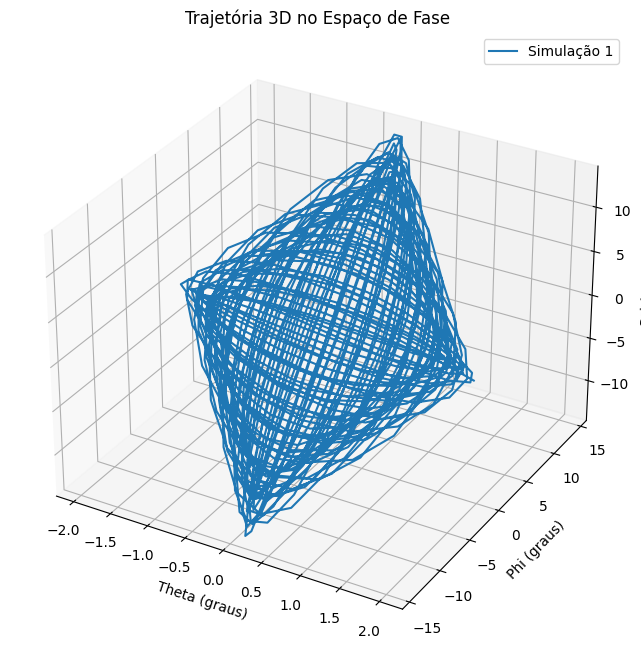

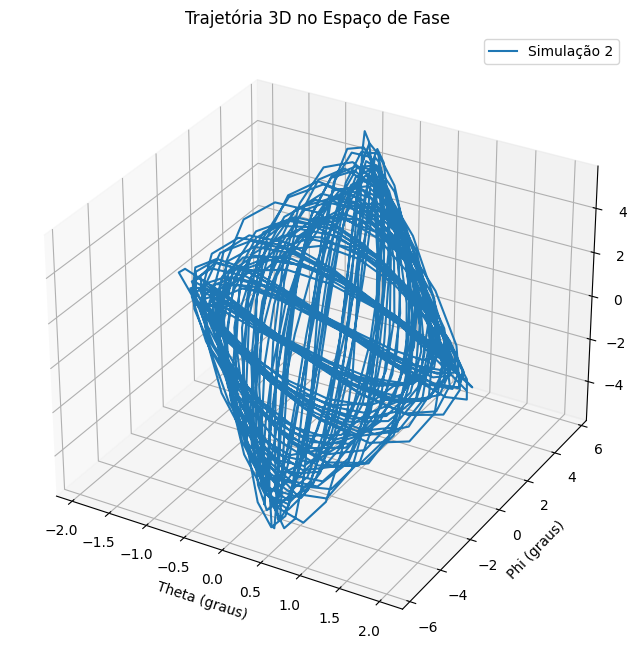

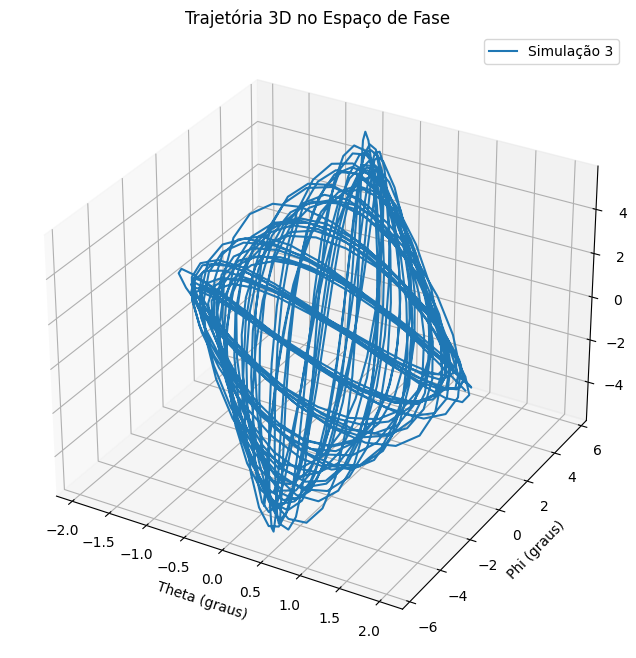

In [ ]:
# Loop sobre as soluções
for n in range(3):
    solution = sol[n]

    # Extraia os resultados
    theta, phi, psi, omega_theta, omega_phi, omega_psi = solution.y

    # Crie um gráfico de fase em 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plote a trajetória no espaço 3D
    ax.plot(np.degrees(theta), np.degrees(phi), np.degrees(psi), label=f'Simulação {n+1}')

    ax.set_xlabel('Theta (graus)')
    ax.set_ylabel('Phi (graus)')
    ax.set_zlabel('Psi (graus)')
    ax.set_title('Trajetória 3D no Espaço de Fase')
    ax.legend()

    plt.show()

## Questão 05

In [ ]:
# Loop sobre os parâmetros
for param in params:
    M, m, a, g = param

    # Definição de variáveis
    k = np.sqrt(M / (2 * m) + 1)
    omega = np.sqrt(g / a)

    # Matrizes de massa e rigidez
    M_matrix = np.array([[2 * k**2, 1, 1],
                        [1, 1, 0],
                        [1, 0, 1]])

    K_matrix = np.array([[2 * k**2 * omega**2, 0, 0],
                        [0, omega**2, 0],
                        [0, 0, omega**2]])

    # Obtendo autovalores e autovetores usando NumPy
    alpha, R = np.linalg.eig(np.linalg.inv(M_matrix).dot(K_matrix))

    # Normalização dos autovetores
    v = np.zeros_like(R)
    for i in range(3):
        v[:, i] = R[:, i] / np.linalg.norm(R[:, i])

    # Imprimir autovalores e autovetores normalizados
    print(f"Para M = {M}, m = {m}, a = {a}, g = {g}:")
    print("Autovalores (p):", np.sqrt(alpha))
    print("Autovetores normalizados:")
    print(v)
    print("\n" + "-"*30 + "\n")

Para M = 100, m = 1, a = 1, g = 10:
Autovalores (p): [2.96170801 3.41002723 3.16227766]
Autovetores normalizados:
[[-0.09853293 -0.09853293  0.        ]
 [-0.70366585  0.70366585 -0.70710678]
 [-0.70366585  0.70366585  0.70710678]]

------------------------------

Para M = 10, m = 1, a = 1, g = 10:
Autovalores (p): [2.66477401 4.11083684 3.16227766]
Autovetores normalizados:
[[-2.77350098e-01 -2.77350098e-01 -1.03402936e-16]
 [-6.79366220e-01  6.79366220e-01 -7.07106781e-01]
 [-6.79366220e-01  6.79366220e-01  7.07106781e-01]]

------------------------------

Para M = 10, m = 1, a = 2, g = 10:
Autovalores (p): [1.88427977 2.9068006  2.23606798]
Autovetores normalizados:
[[-2.77350098e-01 -2.77350098e-01 -1.03402936e-16]
 [-6.79366220e-01  6.79366220e-01 -7.07106781e-01]
 [-6.79366220e-01  6.79366220e-01  7.07106781e-01]]

------------------------------



## Questão 06

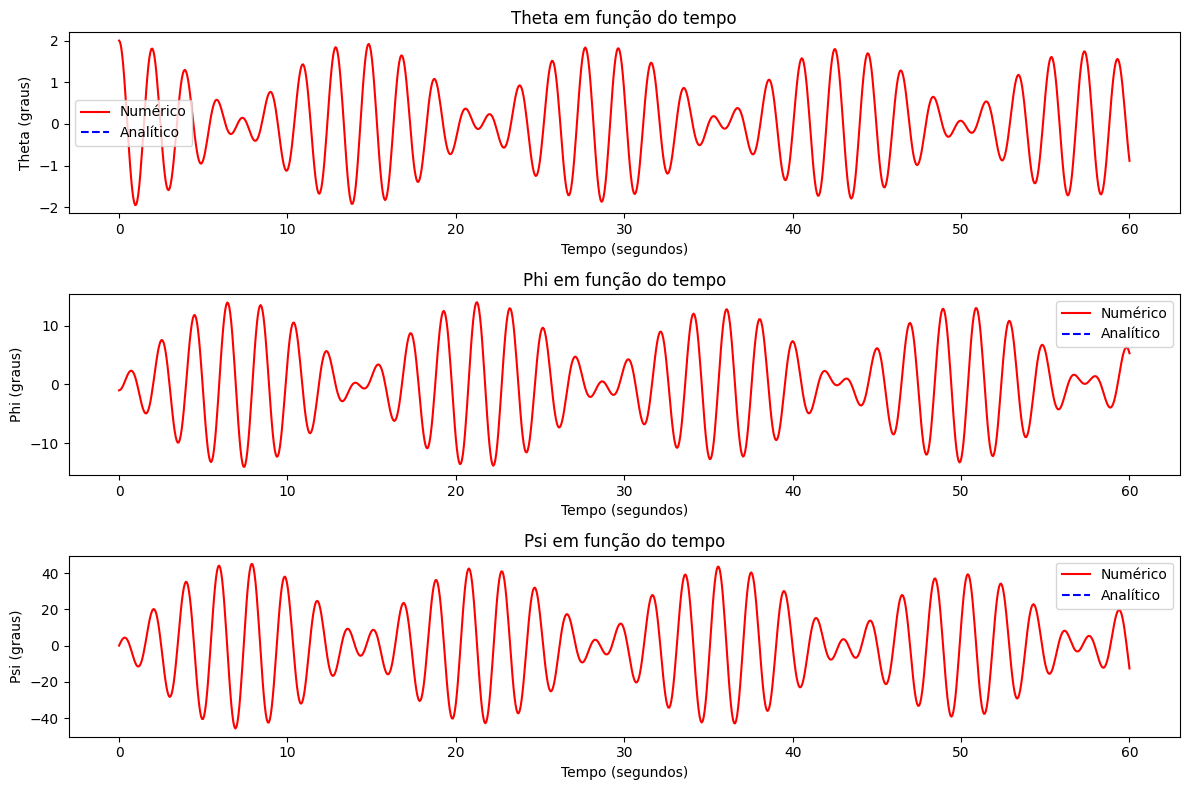

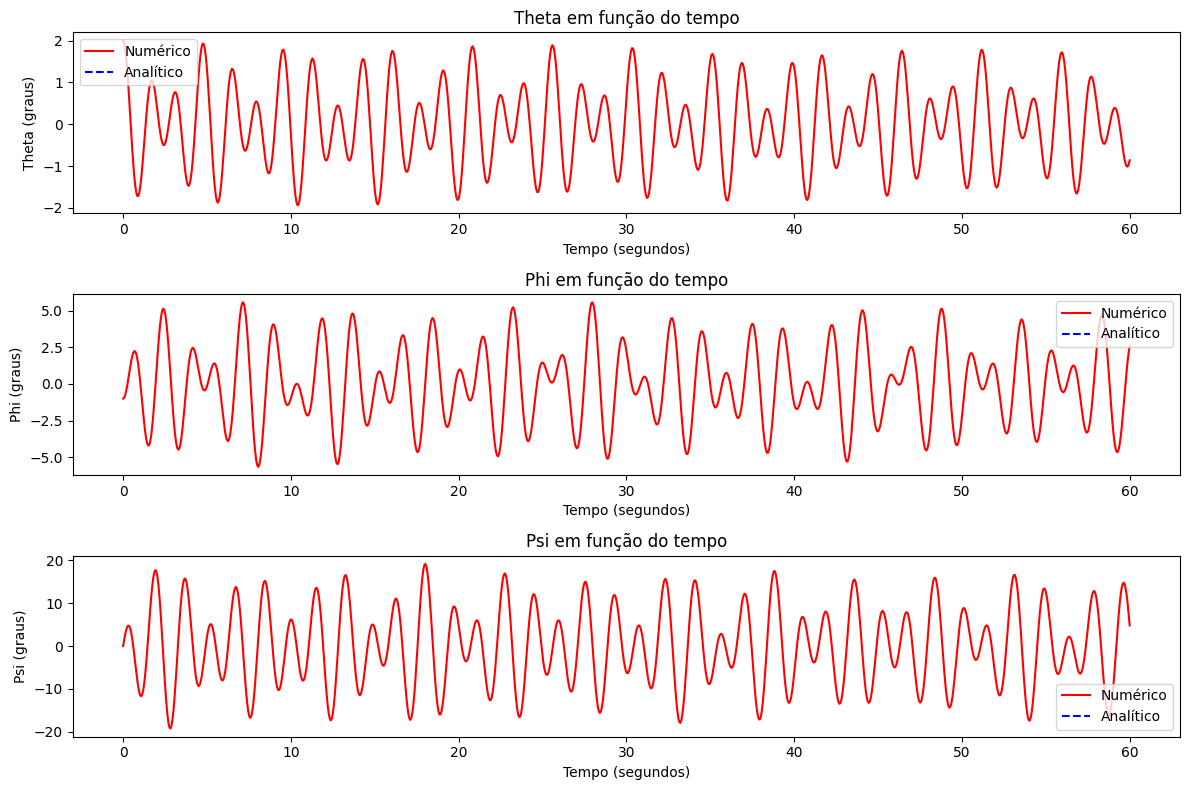

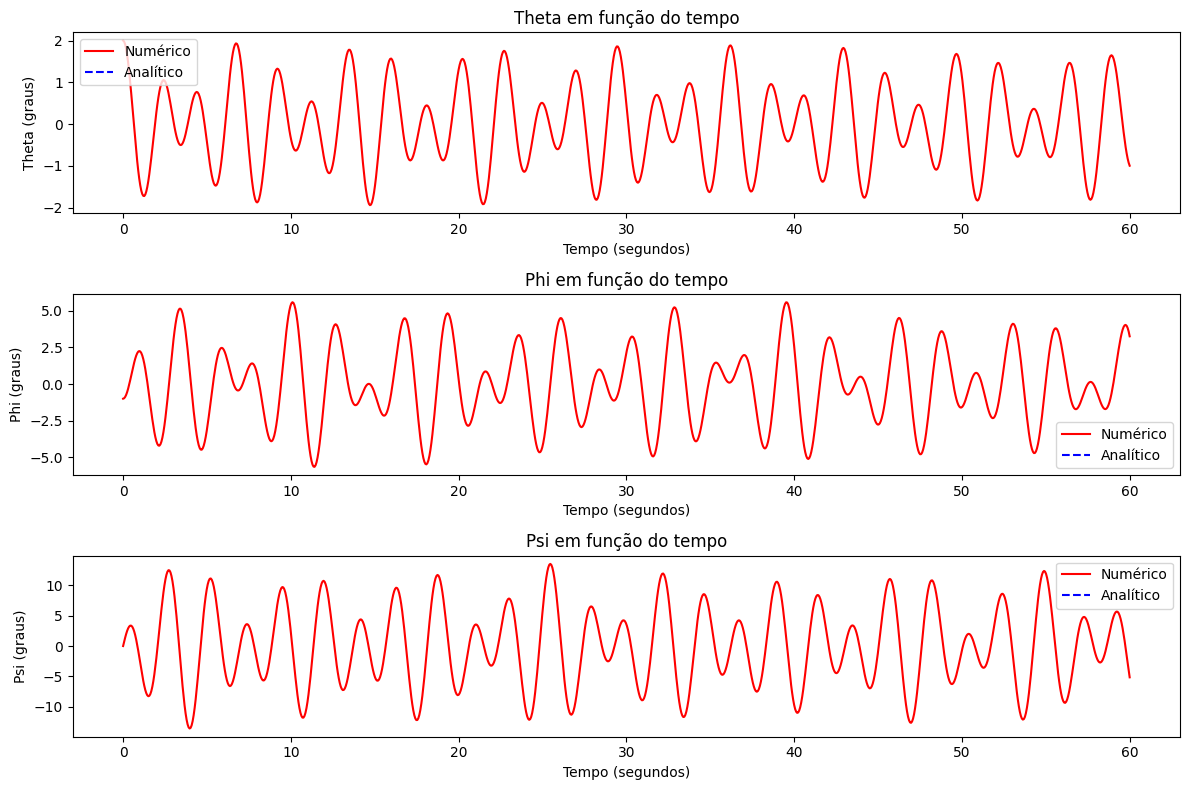

In [ ]:
for param in params:
    np.seterr(all='ignore')
    M, m, a, g = param

    # Tempo de simulação
    t_span = [0, 60]
    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    # Condições iniciais
    theta0 = np.radians(2)
    thetap0 = 0
    phi0 = np.radians(-1)
    phip0 = 0
    psi0 = 0
    psip0 = 0

    z0 = np.array([theta0, thetap0, phi0, phip0, psi0, psip0])

    # Matrizes de massa e rigidez
    k = np.sqrt(M / (2 * m) + 1)
    omega = np.sqrt(g / a)

    M_matrix = np.array([[2 * k**2, 1, 1],
                        [1, 1, 0],
                        [1, 0, 1]])

    K_matrix = np.array([[2 * k**2 * omega**2, 0, 0],
                        [0, omega**2, 0],
                        [0, 0, omega**2]])

    # Obtendo autovalores e autovetores
    alpha, R = np.linalg.eigh(-K_matrix @ np.linalg.inv(M_matrix))

    # Normalização dos autovetores
    v = np.zeros_like(R)
    for i in range(3):
        v[:, i] = R[:, i] / np.sqrt(np.sum(R[:, i]**2))

    # Coeficientes A e B
    A = np.linalg.inv(v) @ np.array([theta0, phi0, psi0])
    B = np.linalg.inv(v) @ np.array([thetap0, phip0, psip0]) / np.sqrt(alpha)

    # Soluções analíticas
    def xi(t): return A[0] * np.cos(np.sqrt(alpha[0]) * t) + B[0] * np.sin(np.sqrt(alpha[0]) * t)
    def eta(t): return A[1] * np.cos(np.sqrt(alpha[1]) * t) + B[1] * np.sin(np.sqrt(alpha[1]) * t)
    def zeta(t): return A[2] * np.cos(np.sqrt(alpha[2]) * t) + B[2] * np.sin(np.sqrt(alpha[2]) * t)

    theta_analytical = lambda t: v[0, 0] * xi(t) + v[0, 1] * eta(t) + v[0, 2] * zeta(t)
    phi_analytical = lambda t: v[1, 0] * xi(t) + v[1, 1] * eta(t) + v[1, 2] * zeta(t)
    psi_analytical = lambda t: v[2, 0] * xi(t) + v[2, 1] * eta(t) + v[2, 2] * zeta(t)

    # Integração numérica usando solve_ivp com RK23
    solution = solve_ivp(linear_model, t_span, z0, method='RK23', t_eval=t_eval)

    # Extrair resultados
    theta, omega_theta, phi, omega_phi, psi, omega_psi = solution.y

    # Plotagem dos resultados
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(solution.t, np.degrees(theta), 'r-', label='Numérico')
    plt.plot(solution.t, np.degrees(theta_analytical(solution.t)), 'b--', label='Analítico')
    plt.title('Theta em função do tempo')
    plt.xlabel('Tempo (segundos)')
    plt.ylabel('Theta (graus)')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(solution.t, np.degrees(phi), 'r-', label='Numérico')
    plt.plot(solution.t, np.degrees(phi_analytical(solution.t)), 'b--', label='Analítico')
    plt.title('Phi em função do tempo')
    plt.xlabel('Tempo (segundos)')
    plt.ylabel('Phi (graus)')
    plt.legend()

    plt.subplot(3, 1, 3)  # Add a new subplot for psi
    plt.plot(solution.t, np.degrees(psi), 'r-', label='Numérico')
    plt.plot(solution.t, np.degrees(psi_analytical(solution.t)), 'b--', label='Analítico')
    plt.title('Psi em função do tempo')
    plt.xlabel('Tempo (segundos)')
    plt.ylabel('Psi (graus)')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Questão 7

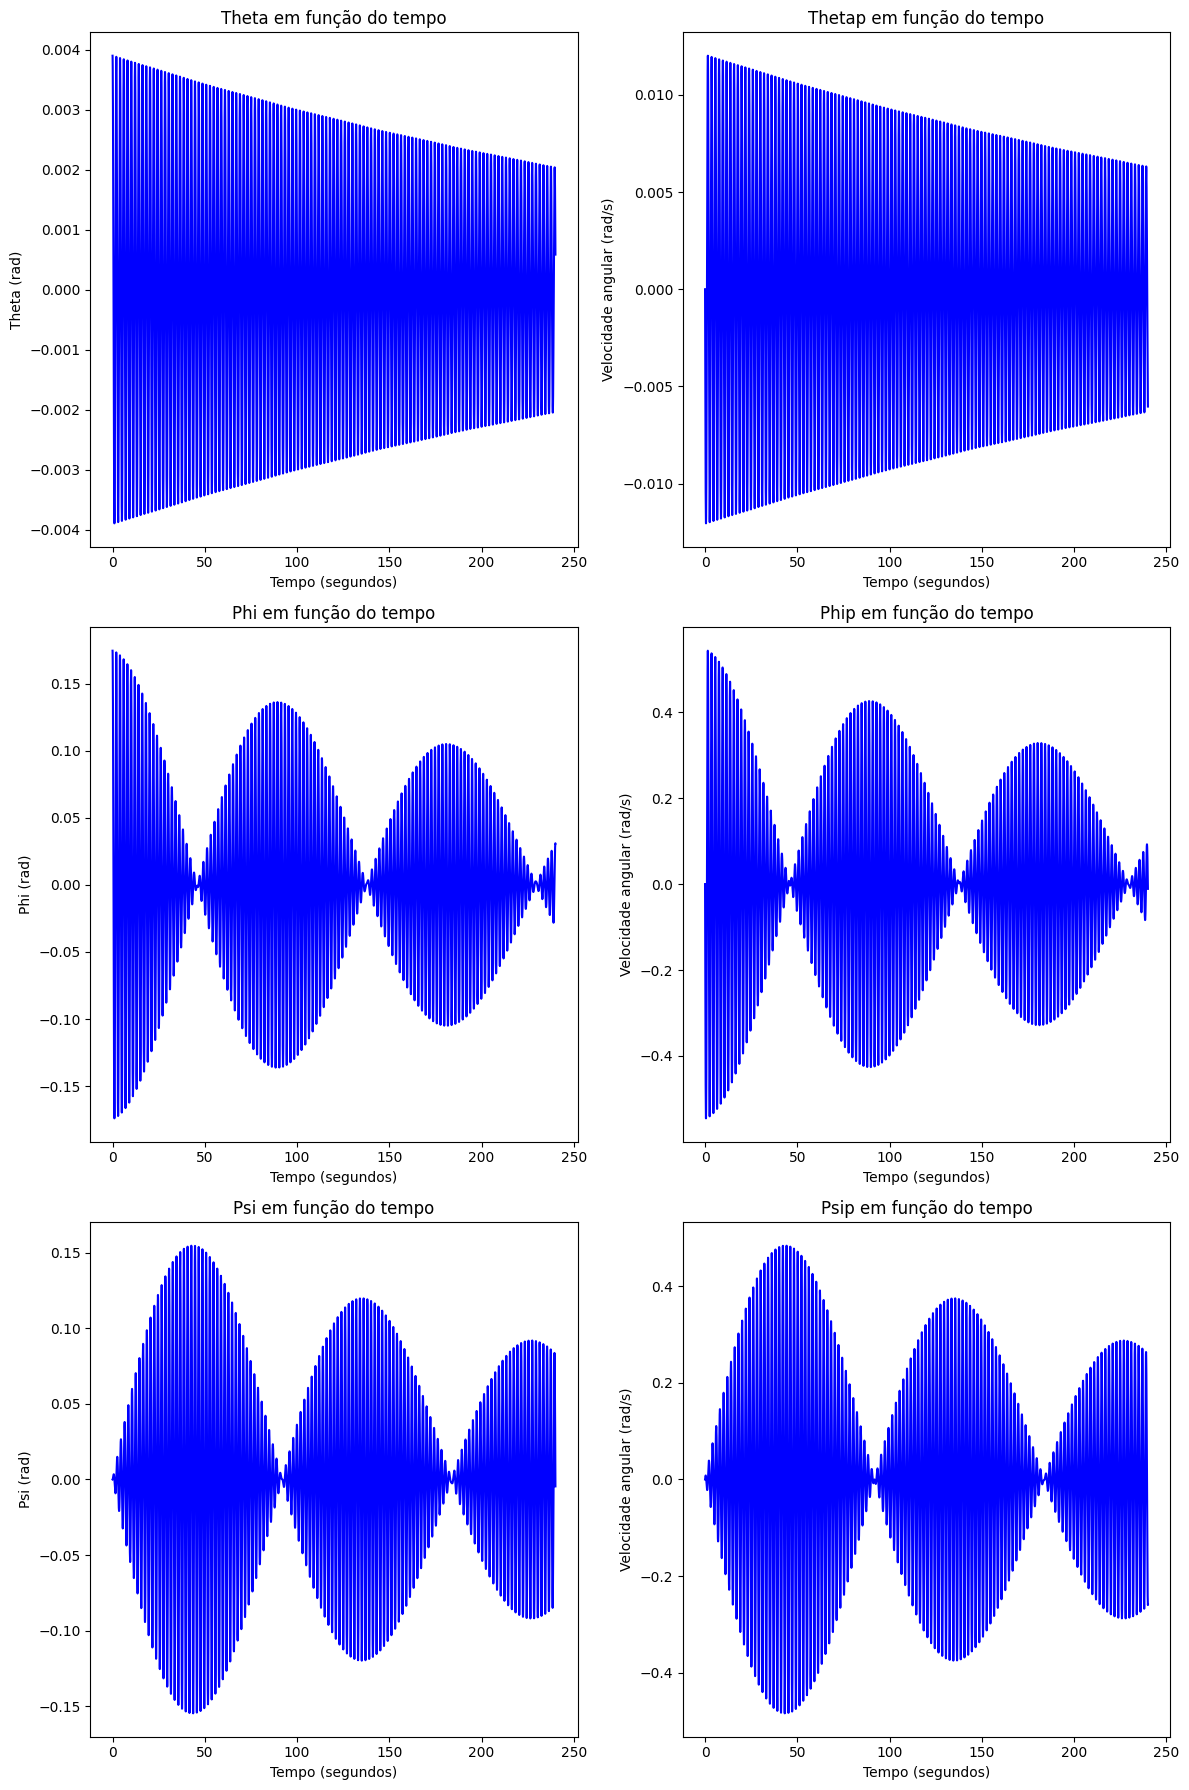

In [ ]:

# Parâmetros do sistema
M = 100  # massa da barra
m = 0.1  # massa puntiforme
a = 1  # comprimento do fio
g = 10  # constante gravitacional
alpha = 10 * np.pi / 180  # alpha
k = np.sqrt(M / (2 * m) + 1)  # k

# Condições iniciais
t0 = 0
tf = 240
h = 0.01
ho = int((tf - t0) / h)
th0 = alpha / (2 * k)
thp0 = 0
phi0 = alpha
phip0 = 0
psi0 = 0
psip0 = 0
w0 = [th0, thp0, phi0, phip0, psi0, psip0]

# Vetor de tempos
t = np.linspace(t0, tf, ho)

# Função derivada
def derivada(t, y):
    omega = np.sqrt(g / a)
    dy = np.zeros_like(y)
    dy[0] = y[1]
    dy[1] = (omega ** 2 / (2 * (k ** 2 - 1))) * (y[2] + y[4]) - k ** 2 * omega ** 2 / (k ** 2 - 1) * y[0]
    dy[2] = y[3]
    dy[3] = -omega ** 2 / (2 * (k ** 2 - 1)) * (y[2] + y[4]) + k ** 2 * omega ** 2 / (k ** 2 - 1) * y[0] - omega ** 2 * y[2]
    dy[4] = y[5]
    dy[5] = -omega ** 2 / (2 * (k ** 2 - 1)) * (y[2] + y[4]) + k ** 2 * omega ** 2 / (k ** 2 - 1) * y[0] - omega ** 2 * y[4]
    return dy

# Integração usando solve_ivp
solution = solve_ivp(derivada, [t0, tf], w0, method='RK23', t_eval=t)

# Atribuição de valores
th = solution.y[0, :]
thp = solution.y[1, :]
phi = solution.y[2, :]
phip = solution.y[3, :]
psi = solution.y[4, :]
psip = solution.y[5, :]

# Gráficos
plt.figure(figsize=(12, 18))

plt.subplot(3, 2, 1)
plt.plot(t, th, 'b-', linewidth=1.5)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Theta (rad)')
plt.title('Theta em função do tempo')

plt.subplot(3, 2, 2)
plt.plot(t, thp, 'b-', linewidth=1.5)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Velocidade angular (rad/s)')
plt.title('Thetap em função do tempo')

plt.subplot(3, 2, 3)
plt.plot(t, phi, 'b-', linewidth=1.5)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Phi (rad)')
plt.title('Phi em função do tempo')

plt.subplot(3, 2, 4)
plt.plot(t, phip, 'b-', linewidth=1.5)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Velocidade angular (rad/s)')
plt.title('Phip em função do tempo')

plt.subplot(3, 2, 5)
plt.plot(t, psi, 'b-', linewidth=1.5)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Psi (rad)')
plt.title('Psi em função do tempo')

plt.subplot(3, 2, 6)
plt.plot(t, psip, 'b-', linewidth=1.5)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Velocidade angular (rad/s)')
plt.title('Psip em função do tempo')

plt.tight_layout()
plt.show()